# Angle-distribution function

The angle-distribution function describes the probability density of finding a triple of atoms with a specific angle. Note that this requires restricting the distance between atoms to a specific bond-length, or some other means to find bonds. Here we describe how to compute the angle distribution if bonds can be determined from a simple distance-based criterion, i.e. two atoms are considered bonded if their distance is smaller than $r_\textrm{b}$. The angle distribution is then

$$
f_\text{a}(\phi) = \frac{1}{N} \sum_{i=1}^N \frac{1}{N_i^2} \sum_{j=1}^N \sum_{k=1}^N \theta(r_{ij}-r_\textrm{b}) \theta(r_{ik}-r_\textrm{b})\, \delta\left(\text{arccos}(\vec{r}_{ij}\cdot \vec{r}_{ik}/(r_{ij} r_{ik}))-\phi\right)
$$

where $\theta(x)$ is the Heaviside step function, $N$ is the total number of atoms and $N_i=\sum_j \theta(r_{ij}-r_\textrm{b})$ is the number of neighbors (coordination number) of atom $i$. This angle-distribution function has the property $\int \text{d}\phi\, f_\text{a}(\phi)=1$, i.e. it is a probability density. It can be calculated from using the utility `angle_distribution` function.

(0.0, 3.141592653589793)

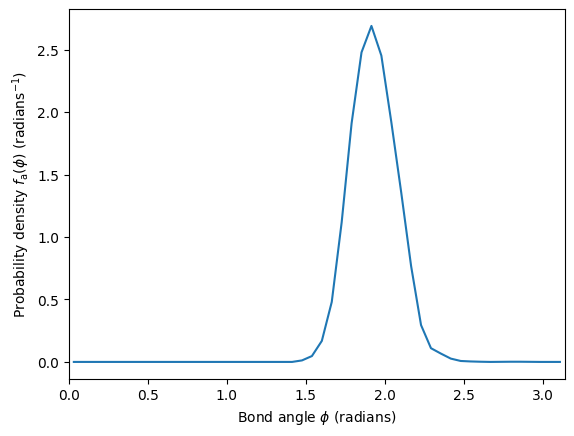

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from ase.io import read
from matscipy.angle_distribution import angle_distribution
from matscipy.neighbours import neighbour_list

# Load a disordered configuration (amorphous carbon)
a = read('../../tests/aC.cfg')

# Two atoms are bonded if their distance is smaller than this value
max_bond_distance = 2.0  # Angstroms

# Get distance between atoms up to a distance of 2 Angstroms which includes only nearest neighbors.
# The capital 'D' returns distance vectors, which are needed for angles.
i, j, d = neighbour_list('ijD', a, cutoff=max_bond_distance)

# Get compute angle distribution
nbins = 50
bin_spacing = np.pi/nbins
angle = (np.arange(nbins) + 0.5) * bin_spacing
nb_angles = angle_distribution(i, j, d, nbins)  # `angle_distribution` returns the number of triangles
probability = nb_angles / (np.sum(nb_angles) * bin_spacing)  # Normalize

# Plot the angle distribution
plt.plot(angle, probability)
plt.xlabel(r'Bond angle $\phi$ (radians)')
plt.ylabel(r'Probability density $f_\text{a}(\phi)$ (radians$^{-1}$)')
plt.xlim(0, np.pi)